In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os


# Configure plot style for academic publication
# Using a seaborn style that resembles Latex/Paper figures
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['font.family'] = 'serif' 
plt.rcParams['figure.dpi'] = 300

Loaded Data:
          Domain  Base AMI  Ours AMI     Delta
0        CS & AI  0.515922  0.753658  0.237736
1  History & Soc  0.560335  0.663721  0.103386
2  Law & Finance  0.503340  0.718988  0.215649
3       Medicine  0.675728  0.843093  0.167365
4  Physics & Eng  0.603003  0.785281  0.182277

Figure saved successfully to ../images/result_comparison.png


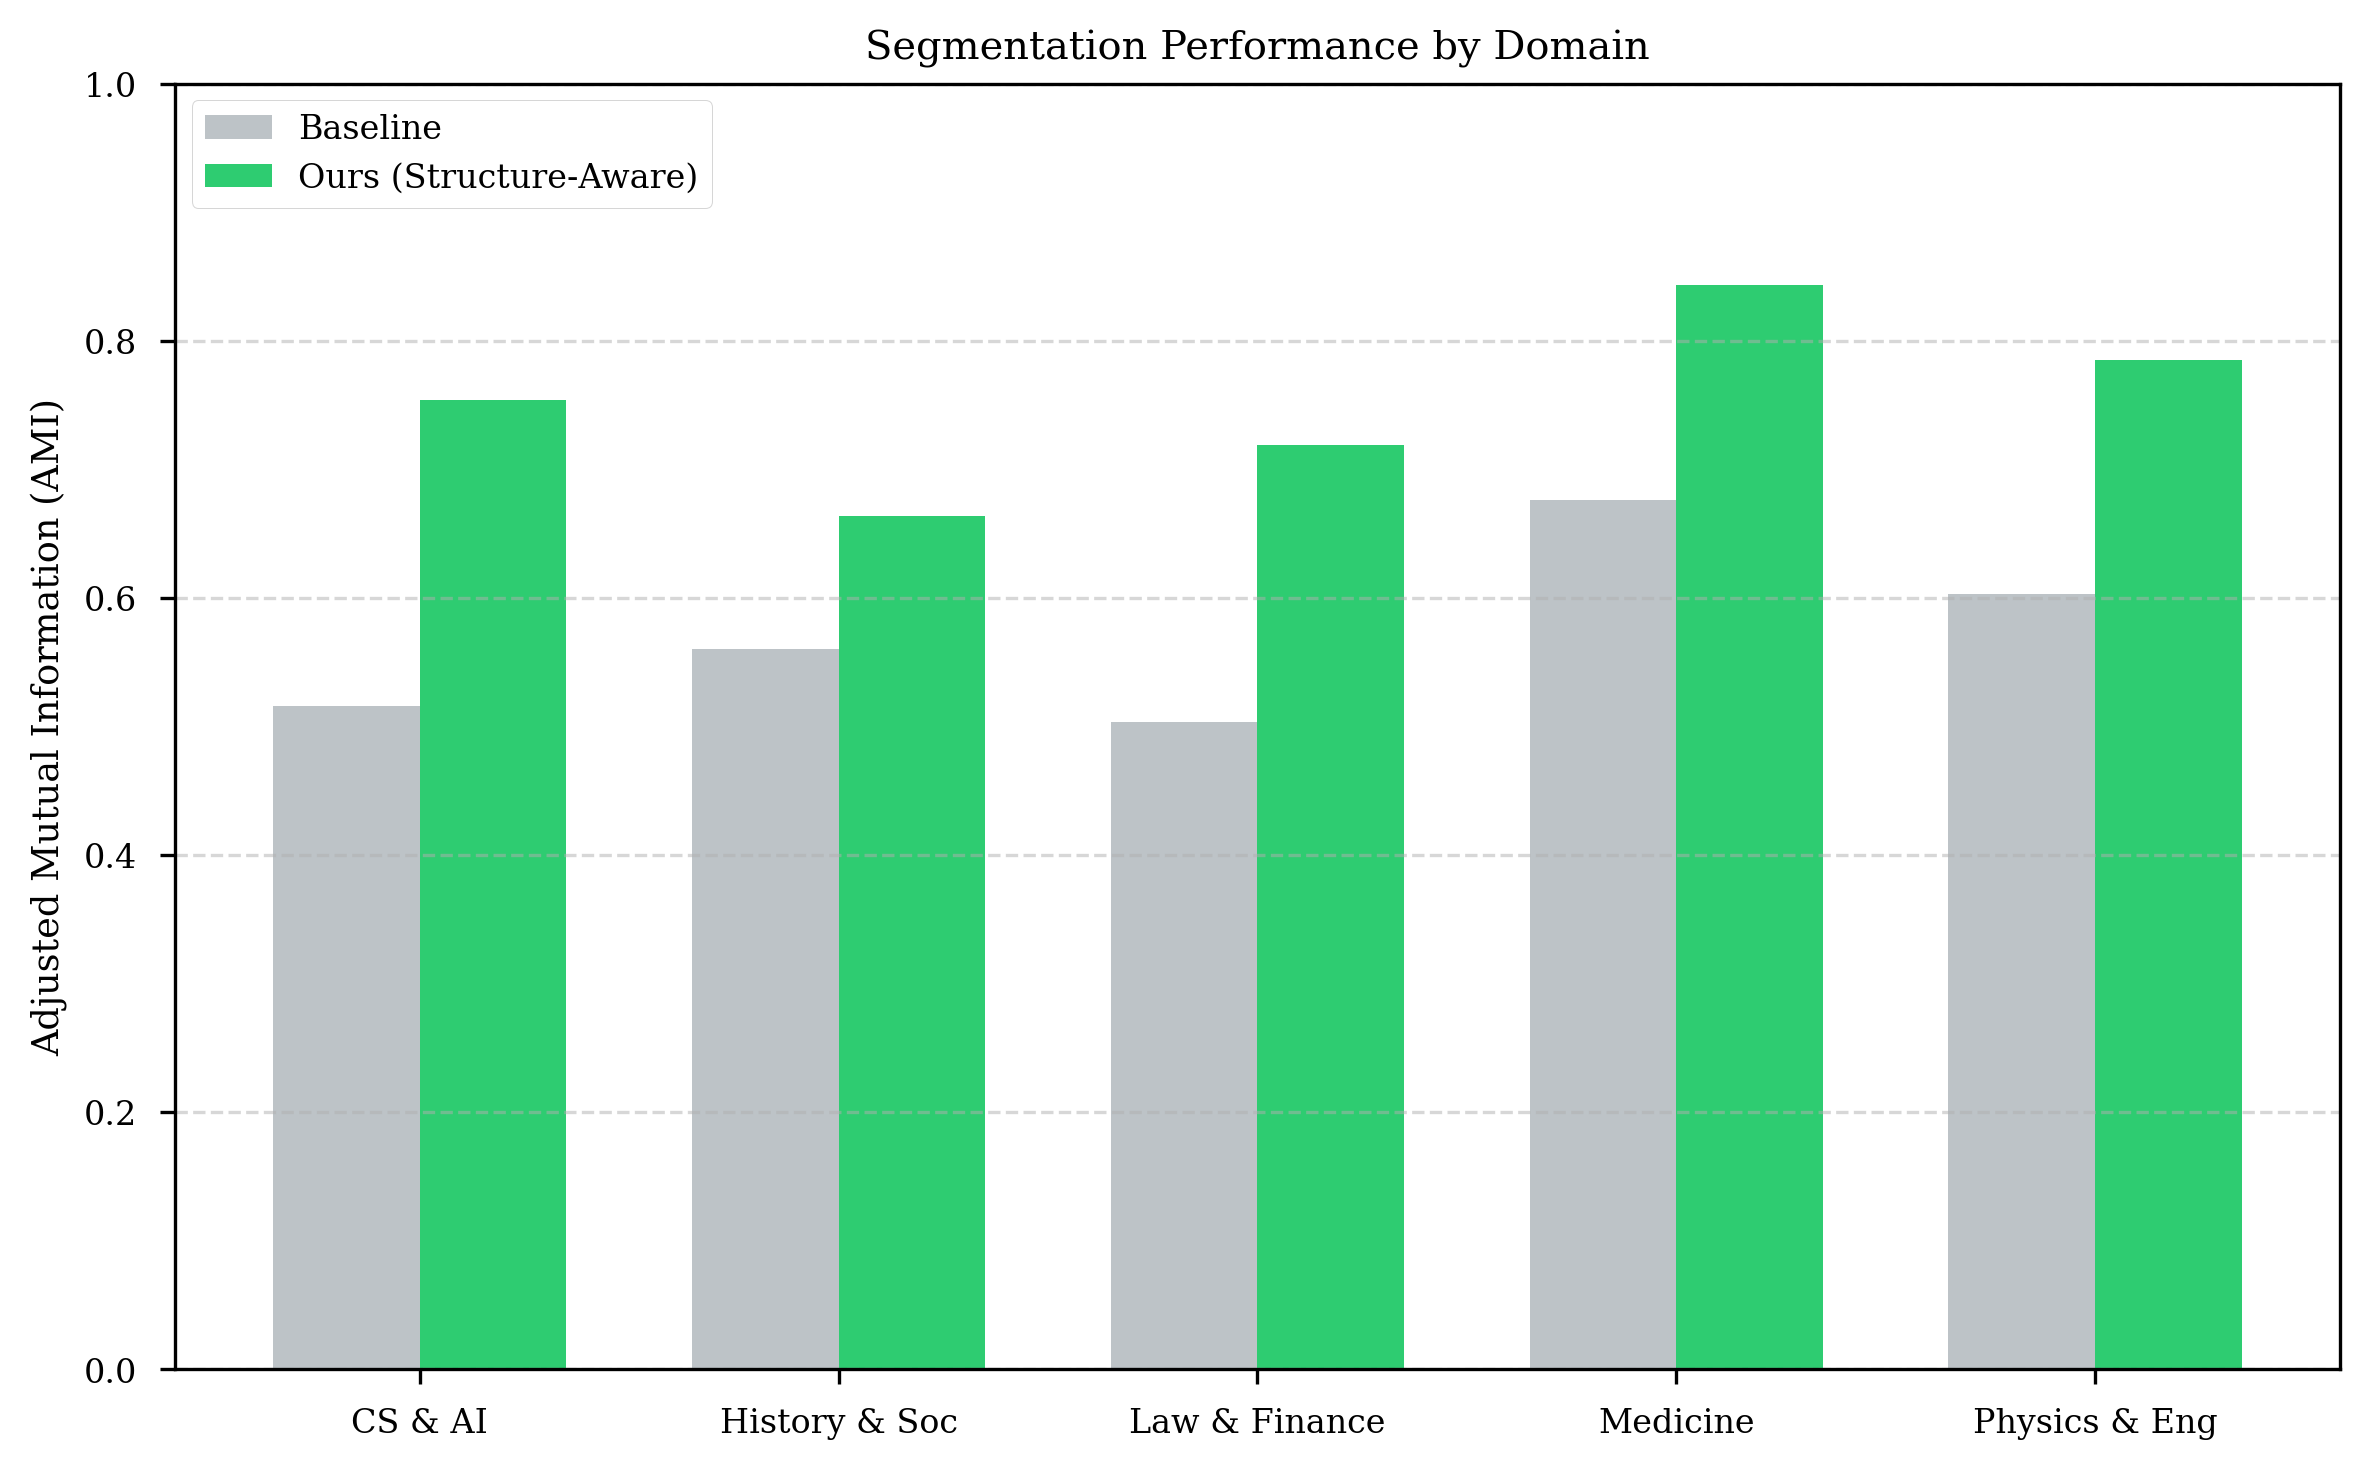

In [4]:
# --- 1. Load Data Automatically ---
# We read the result file generated by 'scripts/run_eval.py'
RESULT_FILE = '../data/eval_summary.csv'

if not os.path.exists(RESULT_FILE):
    raise FileNotFoundError(f"Result file not found at {RESULT_FILE}. Please run 'scripts/run_eval.py' first.")

df = pd.read_csv(RESULT_FILE)

# Display the data to verify
print("Loaded Data:")
print(df)

# --- 2. Create Visualization ---
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 300

# Prepare data for plotting
x = np.arange(len(df))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars using the columns from the CSV
rects1 = ax.bar(x - width/2, df['Base AMI'], width, label='Baseline', color='#bdc3c7')
rects2 = ax.bar(x + width/2, df['Ours AMI'], width, label='Ours (Structure-Aware)', color='#2ecc71')

# Labels and styling
ax.set_ylabel('Adjusted Mutual Information (AMI)')
ax.set_title('Segmentation Performance by Domain')
ax.set_xticks(x)
ax.set_xticklabels(df['Domain'])
ax.legend(loc='upper left')
ax.set_ylim(0, 1.0)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# --- 3. Save Figure ---
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)
save_path = os.path.join(output_dir, 'result_comparison.png')

plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')

print(f"\nFigure saved successfully to {save_path}")
plt.show()